## EDA
### Siniestros viales en Ciudad de Buenos Aires -Argentina

Librerias

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DataFrame 'HECHOS'

In [53]:
df1 = pd.read_excel('Datasets/homicidios.xlsx')
df1.to_csv('Datasets/homicidios.csv')
df_hechos = pd.read_csv('Datasets/homicidios.csv')
df_hechos.head(1)


,Unnamed: 0,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO


DataFrame 'VICTIMAS'

In [54]:
df2 = pd.read_excel('Datasets/homicidios.xlsx', sheet_name= 'VICTIMAS')
df2.to_csv('Datasets/victimas.csv')
df_victimas = pd.read_csv('Datasets/victimas.csv')

df_victimas.head(1)

,Unnamed: 0,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00


Se realiza un merge de ambos Datasets para tener centralizada la informacion

In [55]:
df = pd.merge(df_hechos, df_victimas, left_on='ID', right_on='ID_hecho')
df = pd.merge(df_hechos, df_victimas, left_on='ID', right_on='ID_hecho', how='inner')
df.set_index('ID', inplace=True)
#df = df.drop('ID_hecho', axis=1)

In [56]:
df.head(2)

,Unnamed: 0_x,N_VICTIMAS,FECHA_x,AAAA_x,MM_x,DD_x,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA_x,ACUSADO,Unnamed: 0_y,ID_hecho,FECHA_y,AAAA_y,MM_y,DD_y,ROL,VICTIMA_y,SEXO,EDAD,FECHA_FALLECIMIENTO
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-0001,0,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
2016-0002,1,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00


Se revisan los valores nulos

In [57]:
df.isna().sum()

Unnamed: 0_x               0
N_VICTIMAS                 0
FECHA_x                    0
AAAA_x                     0
MM_x                       0
DD_x                       0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   584
Cruce                    177
Dirección Normalizada      9
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA_x                  0
ACUSADO                    0
Unnamed: 0_y               0
ID_hecho                   0
FECHA_y                    0
AAAA_y                     0
MM_y                       0
DD_y                       0
ROL                        0
VICTIMA_y                  0
SEXO                       0
EDAD                       0
FECHA_FALLECIMIENTO        0
dtype: int64

Se verifican si hay duplicados

In [58]:
df.duplicated().sum()

0

In [59]:
df.drop(columns=['Unnamed: 0_x', 'ID_hecho', 'Unnamed: 0_y','FECHA_y','XY (CABA)', 'Dirección Normalizada', 'AAAA_y', 'MM_y', 'DD_y','VICTIMA_y', 'FECHA_FALLECIMIENTO'], inplace = True)


In [60]:
df.rename(columns={'FECHA_x':'FECHA', 'AAAA_x': 'AAAA', 'MM_x': 'MM', 'DD_x': 'DD', 'VICTIMA_x':'VICTIMA'})
df.head(2)

,N_VICTIMAS,FECHA_x,AAAA_x,MM_x,DD_x,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Altura,Cruce,COMUNA,pos x,pos y,PARTICIPANTES,VICTIMA_x,ACUSADO,ROL,SEXO,EDAD
ID,,,,,,,,,,,,,,,,,,,,,
2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19
2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",NaN,DE LOS CORRALES AV.,9,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70


Se eliminan columnas que no son necesarias

In [61]:
nombres_nuevos = {'N_VICTIMAS':'cant_victimas', 'FECHA_x':'fecha', 'AAAA_x':'año',
                  'MM_x':'mes', 'DD_x':'dia', 'HORA':'hora', 'HH':'franja_horaria', 'LUGAR_DEL_HECHO':'lugar', 'TIPO_DE_CALLE':'tipo_de_calle',
                  'Calle':'calle', 'Altura':'altura', 'Cruce':'cruce','COMUNA':'comuna', 'pos x':'longitud',
                  'pos y':'latitud', 'PARTICIPANTES':'participantes', 'VICTIMA_x':'victima',
                  'ACUSADO':'acusado', 'ROL':'rol', 'SEXO':'sexo', 'EDAD':'edad'}
df = df.rename(columns=nombres_nuevos, index={'ID': 'id_hecho'
                                              })
pd.set_option('display.max_columns', None)

df.head(2)

,cant_victimas,fecha,año,mes,dia,hora,franja_horaria,lugar,tipo_de_calle,calle,altura,cruce,comuna,longitud,latitud,participantes,victima,acusado,rol,sexo,edad
ID,,,,,,,,,,,,,,,,,,,,,
2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19
2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",NaN,DE LOS CORRALES AV.,9,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70


Se verifican los tipos de datos de cada clase, para su postrior correcion

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 717 entries, 2016-0001 to 2021-0097
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cant_victimas   717 non-null    int64  
 1   fecha           717 non-null    object 
 2   año             717 non-null    int64  
 3   mes             717 non-null    int64  
 4   dia             717 non-null    int64  
 5   hora            717 non-null    object 
 6   franja_horaria  717 non-null    object 
 7   lugar           717 non-null    object 
 8   tipo_de_calle   717 non-null    object 
 9   calle           716 non-null    object 
 10  altura          133 non-null    float64
 11  cruce           540 non-null    object 
 12  comuna          717 non-null    int64  
 13  longitud        717 non-null    object 
 14  latitud         717 non-null    object 
 15  participantes   717 non-null    object 
 16  victima         717 non-null    object 
 17  acusado         717 non-nu

Se verifican columnas de longitud y latitud con solo '.' en sus registros

In [63]:
df1 = df[(df['latitud'] == '.') & (df['longitud'] == '.')]
len(df1)



13

Se reemplaza los registros que tienen punto por nulos

In [64]:
df1.head(1)

,cant_victimas,fecha,año,mes,dia,hora,franja_horaria,lugar,tipo_de_calle,calle,altura,cruce,comuna,longitud,latitud,participantes,victima,acusado,rol,sexo,edad
ID,,,,,,,,,,,,,,,,,,,,,
2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,"LUGONES, LEOPOLDO AV.",NaN,NaN,13,.,.,MOTO-SD,MOTO,SD,SD,SD,SD


In [65]:
def reemplazar_punto(registro):
    if registro == '.':
        return None
    else:
        return float(registro)


In [66]:
df['latitud'] = df['latitud'].apply(reemplazar_punto)
df['longitud'] = df['longitud'].apply(reemplazar_punto)

In [67]:
df[['latitud', 'longitud']] = df[['latitud', 'longitud']].astype(float)

Se verifican valores 'SD' en la columna franja horaria

In [68]:
def cambiar_int(franja_horaria):
    if franja_horaria == 'SD':
        return 12
    else:
        franja_horaria = int(franja_horaria)
        return franja_horaria

In [69]:
df['franja_horaria'] = df['franja_horaria'].apply(cambiar_int)

In [70]:
def cambiar_tipo(hora):
    if hora == 'SD':
        return None
    else:
       return hora

In [71]:
df['hora'] = df['hora'].apply(cambiar_tipo)

In [78]:
df['hora'] = pd.to_datetime(df['hora'])
   

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 717 entries, 2016-0001 to 2021-0097
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   cant_victimas     717 non-null    int64         
 1   fecha             717 non-null    object        
 2   año               717 non-null    int64         
 3   mes               717 non-null    int64         
 4   dia               717 non-null    int64         
 5   hora              716 non-null    datetime64[ns]
 6   franja_horaria    717 non-null    int64         
 7   lugar             717 non-null    object        
 8   tipo_de_calle     717 non-null    object        
 9   calle             716 non-null    object        
 10  altura            133 non-null    float64       
 11  cruce             540 non-null    object        
 12  comuna            717 non-null    int64         
 13  longitud          704 non-null    float64       
 14  latitud          

Se adiciona una columna relacionado la fecha al dia de la semana


In [74]:
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y-%m-%d', errors='coerce')

In [75]:
df['dia_de_la_semana'] = df['fecha'].dt.day_name()


In [76]:
df['fecha'] = df['fecha'].astype(str)

Edad

In [77]:
#se calcula la mediana de la serie edad
df_mediana = df[df['edad'] != 'SD']
mediana = df_mediana['edad'].median()
df_mediana.shape



TypeError: Cannot convert ['19' '70' '30' '18' '29' '30' '29' '18' '22' '16' '16' '19' '59' '65'
 '59' '34' '41' '34' '30' '34' '50' '38' '21' '52' '34' '36' '20' '29'
 '20' '54' '56' '24' '41' '78' '36' '38' '30' '79' '26' '57' '37' '20'
 '20' '30' '58' '30' '23' '60' '42' '53' '30' '51' '60' '40' '87' '76'
 '57' '75' '23' '70' '35' '60' '24' '35' '29' '80' '43' '45' '57' '67'
 '29' '21' '19' '38' '21' '53' '57' '27' '24' '60' '55' '30' '43' '27'
 '49' '58' '67' '30' '37' '60' '50' '81' '29' '35' '30' '41' '25' '29'
 '30' '33' '35' '20' '46' '35' '83' '39' '29' '55' '41' '42' '83' '38'
 '29' '23' '23' '23' '29' '50' '38' '23' '29' '37' '43' '24' '21' '38'
 '35' '28' '27' '7' '18' '33' '48' '29' '36' '23' '29' '30' '4' '22' '82'
 '27' '32' '30' '43' '39' '23' '23' '19' '87' '34' '27' '70' '40' '28'
 '43' '28' '32' '30' '20' '41' '40' '43' '17' '21' '37' '22' '46' '16'
 '33' '47' '28' '20' '32' '80' '39' '30' '47' '35' '79' '61' '21' '10'
 '21' '32' '39' '80' '25' '19' '70' '55' '30' '60' '33' '95' '36' '37'
 '73' '84' '30' '73' '43' '23' '22' '58' '66' '56' '36' '87' '61' '28'
 '16' '61' '46' '18' '85' '41' '17' '10' '21' '56' '79' '1' '76' '26' '34'
 '22' '26' '20' '36' '51' '29' '39' '36' '24' '60' '57' '23' '23' '47'
 '24' '55' '60' '25' '15' '24' '22' '50' '50' '58' '49' '82' '13' '56'
 '19' '30' '76' '77' '53' '32' '27' '30' '30' '83' '26' '58' '39' '54'
 '45' '46' '32' '19' '40' '84' '20' '44' '28' '19' '31' '35' '26' '80'
 '26' '62' '28' '28' '70' '70' '24' '30' '74' '71' '26' '24' '31' '70'
 '42' '24' '39' '37' '84' '59' '61' '37' '78' '23' '25' '50' '60' '11'
 '82' '57' '40' '47' '57' '78' '43' '86' '21' '69' '33' '26' '54' '51'
 '51' '32' '28' '30' '35' '73' '81' '21' '20' '33' '27' '67' '25' '23'
 '73' '58' '27' '26' '35' '17' '45' '22' '30' '40' '75' '80' '27' '23'
 '23' '24' '32' '49' '39' '35' '55' '54' '18' '33' '20' '1' '22' '56' '27'
 '62' '37' '34' '60' '28' '28' '20' '23' '42' '48' '30' '80' '32' '51'
 '72' '33' '25' '44' '29' '27' '29' '49' '39' '37' '29' '70' '60' '56'
 '80' '70' '29' '79' '28' '78' '75' '32' '22' '25' '32' '23' '71' '43'
 '12' '35' '42' '34' '59' '31' '39' '69' '21' '40' '22' '29' '43' '23'
 '34' '32' '27' '37' '27' '25' '20' '83' '25' '75' '34' '17' '42' '28'
 '44' '78' '39' '77' '33' '26' '76' '32' '72' '21' '41' '49' '21' '47'
 '75' '63' '39' '30' '78' '58' '60' '20' '55' '40' '35' '53' '43' '25'
 '22' '29' '35' '31' '29' '28' '72' '57' '76' '67' '47' '73' '40' '20'
 '29' '41' '27' '92' '67' '35' '37' '16' '73' '23' '61' '38' '25' '18'
 '24' '23' '82' '87' '36' '44' '82' '25' '23' '52' '49' '48' '31' '66'
 '58' '29' '68' '31' '80' '74' '87' '44' '44' '53' '28' '76' '91' '80'
 '40' '29' '21' '32' '40' '72' '38' '46' '64' '44' '34' '53' '64' '43'
 '50' '41' '15' '41' '36' '28' '49' '44' '27' '59' '91' '34' '84' '57'
 '49' '69' '45' '47' '38' '21' '24' '27' '51' '71' '25' '81' '4' '42' '56'
 '39' '23' '78' '30' '24' '26' '28' '36' '47' '27' '61' '73' '23' '84'
 '28' '31' '28' '21' '41' '28' '26' '22' '33' '36' '30' '39' '68' '24' '5'
 '37' '36' '19' '26' '36' '68' '60' '33' '26' '24' '36' '58' '44' '86'
 '27' '75' '39' '50' '21' '22' '20' '59' '44' '74' '56' '73' '19' '58'
 '41' '47' '60' '46' '24' '44' '80' '55' '73' '31' '37' '63' '59' '27'
 '39' '17' '31' '88' '57' '76' '55' '65' '31' '31' '22' '32' '26' '38'
 '30' '32' '49' '75' '73' '45' '41' '73' '24' '50' '18' '43' '27' '60'
 '53'] to numeric

In [ ]:
def convertir_edad_to_int(registro):
    if registro == 'SD':
        return int(mediana_edad)
    else:
        return int(registro)
df['edad'] = df['edad'].apply(convertir_edad_to_int)

#df['edad'].replace(100, mediana_edad)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 717 entries, 2016-0001 to 2021-0097
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   cant_victimas     717 non-null    int64         
 1   fecha             717 non-null    object        
 2   año               717 non-null    int64         
 3   mes               717 non-null    int64         
 4   dia               717 non-null    int64         
 5   hora              716 non-null    datetime64[ns]
 6   franja_horaria    717 non-null    int64         
 7   lugar             717 non-null    object        
 8   tipo_de_calle     717 non-null    object        
 9   calle             716 non-null    object        
 10  altura            133 non-null    float64       
 11  cruce             540 non-null    object        
 12  comuna            717 non-null    int64         
 13  longitud          704 non-null    float64       
 14  latitud          

In [ ]:
column_to_move = 'dia_de_la_semana'
new_position = 5  # Puedes ajustar este índice según tu preferencia
current_columns = df.columns.tolist()
current_columns.remove(column_to_move)
current_columns.insert(new_position, column_to_move)
df = df[current_columns]
df.head(1)


,cant_victimas,fecha,año,mes,dia,dia_de_la_semana,hora,franja_horaria,lugar,tipo_de_calle,calle,altura,cruce,comuna,longitud,latitud,participantes,victima,acusado,rol,sexo,edad
ID,,,,,,,,,,,,,,,,,,,,,,
2016-0001,1,2016-01-01,2016,1,1,Friday,2024-02-10 04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",8,-58.47534,-34.68757,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19


### Outliers

Edad

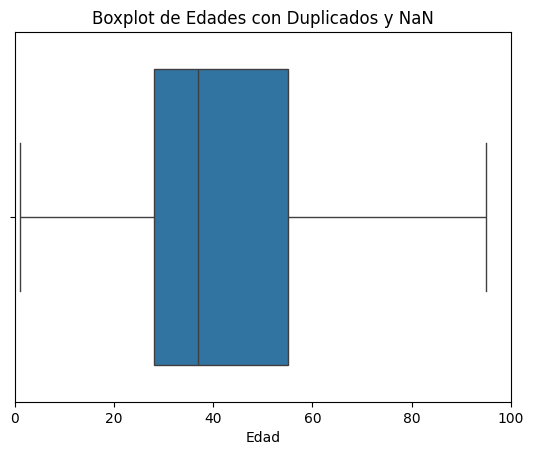

In [ ]:
sns.boxplot(x=df['edad'])
plt.title('Boxplot de Edades con Duplicados y NaN')
plt.xlabel('Edad')
plt.xlim(0,100)
plt.show()

Analiticamente usando el metodo de las tres sigmas se comprueba que no hay valores atipicos

In [ ]:
std = df['edad'].std()
mu = df['edad'].mean()
outlier = round(mu + 3*std, 2)
outlier

100.25

Como se observa todos aquellos valores por encima de 99, se procede a  verificar si existen valores superiores a ese rango

In [ ]:
df[df['edad']>99]

,cant_victimas,fecha,año,mes,dia,dia_de_la_semana,hora,franja_horaria,lugar,tipo_de_calle,calle,altura,cruce,comuna,longitud,latitud,participantes,victima,acusado,rol,sexo,edad
ID,,,,,,,,,,,,,,,,,,,,,,


No existen resgitros en ese rango, por lo tanto se concluye que no hay outliers para edad

In [ ]:
df.to_csv('Datasets/data.csv') 

In [ ]:
df.to_csv('Datasets/data.xlsx') 